In [2]:
from google.colab import files

uploaded = files.upload()

# The file is now in the current directory
import pandas as pd
import io

# Get the filename (assuming you uploaded only one file)
filename = next(iter(uploaded))

df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(df.head())

Saving Flight Dataset.csv to Flight Dataset.csv
   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...   

In [3]:
# check for missing values per column
print(df.isnull().sum())

# check for duplicate rows
print(df.duplicated().sum())

# check data types (e.g., ensuring numbers aren't stored as text)
print(df.info())

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [6]:
# Remove Duplicates
df = df.drop_duplicates()

# Handle Missing Values
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

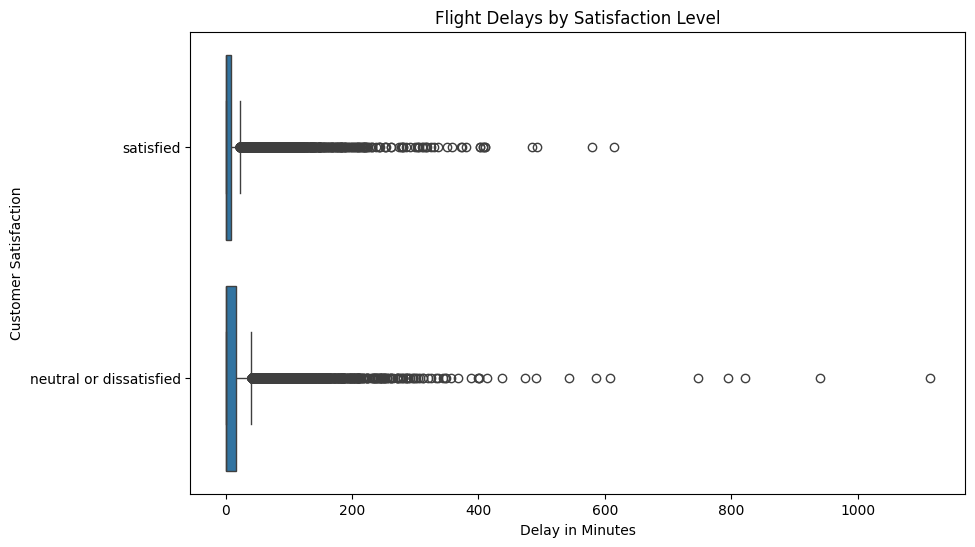

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Boxplot: The line inside the box is the Median delay
sns.boxplot(y='satisfaction', x='Arrival Delay in Minutes', data=df, showfliers=True)
# Note: showfliers=False hides extreme outliers (like 500 min delays) so you can see the main box better.

plt.title('Flight Delays by Satisfaction Level')
plt.xlabel('Delay in Minutes')
plt.ylabel('Customer Satisfaction')
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# 1. Separate your data into two groups
satisfied_delays = df[df['satisfaction'] == 'satisfied']['Arrival Delay in Minutes']
dissatisfied_delays = df[df['satisfaction'] == 'neutral or dissatisfied']['Arrival Delay in Minutes']

# 2. Run the test
# 'alternative="less"' checks if satisfied people have LESS delay than dissatisfied people
stat, p_value = mannwhitneyu(satisfied_delays, dissatisfied_delays, alternative='less')

print(f"Statistic: {stat}")
print(f"P-Value: {p_value}")

# 3. Interpret the result
if p_value < 0.05:
    print("RESULT: Statistically Significant. Delays are genuinely lower for satisfied customers.")
else:
    print("RESULT: Not Significant. The difference could be due to random chance.")

Statistic: 74285701.5
P-Value: 3.4235520002859344e-59
RESULT: Statistically Significant. Delays are genuinely lower for satisfied customers.
